# Reading in ERA-5 Data and Comparing with GridRad

## Overview

In the last notebook, we read in and analyzed radar reflectivity and azimuthal shear data from GridRad-Severe over the Turin, NY supercell on August 7th, 2023. In this follow-up notebook, we will look at a couple more variables centered around this severe thunderstorm event, this time using the ERA-5 hourly single-level data, which is part of the fifth-generation ECMWF reanalysis provided by Destination Earth's Earth Data Hub. We will then compare these graphs to the GridRad data plotted in the previous notebook and see if they match up with actual observations. 

1. Prerequisites
2. Imports
3. Content
4. Summary
5. Conclusions
6. Resources and References

## Prerequisites 

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/) | Necessary | |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy) | Necessary | |
| [Understanding of Datetime](https://foundations.projectpythia.org/core/datetime/) | Helpful | Using times and calendars in Python |
| [Using MetPy](https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html) | Helpful | Working with Units and Making Conversions |
| [Understanding of Xarray](https://foundations.projectpythia.org/core/xarray/) | Helpful | Analysis of gridded datasets |
| [Understanding of Matplotlib](https://foundations.projectpythia.org/core/matplotlib/) | Helpful | Creating plots in Python |

- **Time to learn**: About 1 hour (10 minutes per subsection)

## Imports

As always, we will start off my importing any relevant datasets we will need in this notebook. We use xarray, numpy, cartopy and matplotlib like in the last notebook, but in addition, we will need the datetime library to read in specific dates and make a time string, and metpy to make unit conversions and calculations. 

In [1]:
import xarray as xr
import numpy as np
from datetime import datetime as dt
from metpy.units import units
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

## Content #1: Importing ERA5 Pressure Level Data 

We will first use xarray to access the ERA5 hourly data on pressure levels, accessible via an Analysis Ready, Cloud Optimized (ARCO) format on Destination Earth's Earth Data Hub. We will point the object to the Zarr engine: 

In [2]:
%%time 

ds = xr.open_dataset(
    "https://data.earthdatahub.destine.eu/era5/reanalysis-era5-pressure-levels-v0.zarr",
    storage_options={"client_kwargs":{"trust_env":True}},
    chunks={},
    engine="zarr",
)

print(f'size: {ds.nbytes / (1024 ** 4)} TB')

size: 863.9610183753794 TB
CPU times: user 1.43 s, sys: 183 ms, total: 1.61 s
Wall time: 5.16 s


Next, let's specify the region and time of interest. For this, we will use the same date/time we used in Notebook 1 to analyze the same storm and environment. 

In [3]:
lonW = -77.7
lonE = -73.7
latS = 42.6
latN = 44.6
cLat, cLon = (latS + latN)/2, (lonW + lonE)/2 

# In ERA5, longitudes run between 0 and 360, not -180 and 180:
if (lonW < 0 ):
    lonW = lonW + 360
if (lonE < 0 ):
    lonE = lonE + 360
    
expand = 1
latRange = np.arange(latS - expand,latN + expand,.25) # Expanding data range a bit beyond the plot range
lonRange = np.arange((lonW - expand),(lonE + expand),.25) # Need to match longitude values to those of the coordinate variable

# Specifying date/time: We use 0000Z on 8-8-2023, which is the most recent hourly time marker around the Turin supercell. 
Year = 2023
Month = 8
Day = 8
Hour = 0
Minute = 0
dateTime = dt(Year,Month,Day,Hour)
timeStr = dateTime.strftime("%Y-%m-%d %H%M UTC")
timeStr

'2023-08-08 0000 UTC'

## Further examine the dataset: 

In [4]:
ds

<xarray.Dataset> Size: 950TB
Dimensions:        (valid_time: 752424, isobaricInhPa: 19, latitude: 721,
                    longitude: 1440)
Coordinates:
  * valid_time     (valid_time) datetime64[ns] 6MB 1940-01-01 ... 2025-10-31T...
  * isobaricInhPa  (isobaricInhPa) int32 76B 1000 925 850 700 600 ... 20 10 5 1
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    number         int64 8B ...
Data variables: (12/16)
    cc             (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    ciwc           (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    clwc           (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    crwc           (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    cswc           (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    d              (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    ...             ...
    t              (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    u              (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    v              (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    vo             (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    w              (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
    z              (valid_time, isobaricInhPa, latitude, longitude) float32 59TB dask.array<chunksize=(120, 1, 256, 256), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2024-11-15T16:05 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

The first variable I thought would be helpful to analyze would be the vertical velocity. I retrieved the variable from the DataArray, and then further examined it. 

In [5]:
%%time 
use_DE = True

if (use_DE):
    vert = ds['w'].sel(valid_time=dateTime,latitude=latRange,longitude=lonRange, method='nearest')
else:
    vert = ds['lagrangian_tendency_of_air_pressure'].sel(time=dateTime,latitude=latRange,longitude=lonRange)

vert

CPU times: user 3.9 s, sys: 338 ms, total: 4.24 s
Wall time: 4.25 s


<xarray.DataArray 'w' (isobaricInhPa: 19, latitude: 16, longitude: 24)> Size: 29kB
dask.array<getitem, shape=(19, 16, 24), dtype=float32, chunksize=(1, 16, 24), chunktype=numpy.ndarray>
Coordinates:
  * isobaricInhPa  (isobaricInhPa) int32 76B 1000 925 850 700 600 ... 20 10 5 1
  * latitude       (latitude) float64 128B 41.5 41.75 42.0 ... 44.75 45.0 45.25
  * longitude      (longitude) float64 192B 281.2 281.5 281.8 ... 286.8 287.0
    number         int64 8B ...
    valid_time     datetime64[ns] 8B 2023-08-08
Attributes: (12/31)
    GRIB_NV:                                  0
    GRIB_Nx:                                  1440
    GRIB_Ny:                                  721
    GRIB_cfName:                              lagrangian_tendency_of_air_pres...
    GRIB_cfVarName:                           w
    GRIB_dataType:                            an
    ...                                       ...
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_units:                               Pa s**-1
    GRIB_uvRelativeToGrid:                    0
    long_name:                                Vertical velocity
    standard_name:                            lagrangian_tendency_of_air_pres...
    units:                                    Pa s**-1

## Performing unit conversions

It can be seen that the data variable is in units of Pa/s. It would be better to convert this into hectopascals (hPa) since that is more commonly measured on meteorological maps. This is where MetPy comes in handy, as we can use a unit conversion method on the DataArray to convert it into hPa/s:

In [6]:
vert_hpa = vert.metpy.convert_units('hPa/s')

Let's look at the updated data values:

In [7]:
print(vert_hpa.values)

[[[-3.24401859e-04 -1.60980228e-04  2.94494621e-05 ... -1.09375000e-03
   -2.27783201e-03 -2.13012681e-03]
  [-3.74450668e-04 -4.00085439e-04  1.38282769e-06 ...  2.05230710e-04
   -1.63208006e-03 -2.26562493e-03]
  [-2.74505612e-04 -1.97601315e-04  2.12554922e-04 ...  1.14990235e-03
   -6.75048796e-04 -2.58544926e-03]
  ...
  [-6.82067839e-05 -9.87243620e-05 -9.87243620e-05 ... -1.53076171e-03
    8.80126958e-04  2.68798834e-03]
  [-8.38279720e-06 -6.94274859e-05 -1.24359125e-04 ... -9.63134749e-04
    6.09436014e-04  2.17773439e-03]
  [ 8.19396955e-05  3.55529774e-05 -8.28552220e-05 ... -3.54919437e-04
    2.12554922e-04  1.42822263e-03]]

 [[-1.32324221e-03 -5.51452627e-04 -3.31726071e-04 ... -4.48486302e-03
   -6.40624994e-03 -5.03417943e-03]
  [-1.00585935e-03 -3.31726071e-04 -5.92956552e-04 ... -1.99890128e-04
   -4.65087872e-03 -5.18554682e-03]
  [-1.08154293e-03 -5.12390106e-04 -5.02624491e-04 ...  3.26171867e-03
   -2.29003909e-03 -7.29003875e-03]
  ...
  [-7.42187491e-04 -7.2

Next, we need to set a specified pressure level for this data variable. We will select 700 hPa since that is a common atmospheric level in the mid-troposphere where many weather processes occur. Also, since we are making a 2D map from 3D data, we need to convert the data variable into 2-D dimensions. We do this by using xarray's .sel function. 

In [8]:
target_pressure = 700 * units.hPa 
vert_selected_level = vert_hpa.sel(isobaricInhPa=target_pressure, method='nearest')

print("Shape after selecting 700 hPa level:", vert_selected_level.shape) # Making sure data is in the correct dimensions. 

Shape after selecting 700 hPa level: (16, 24)


## Plotting the map 

We then use matplotlib functions to plot the data on a map.

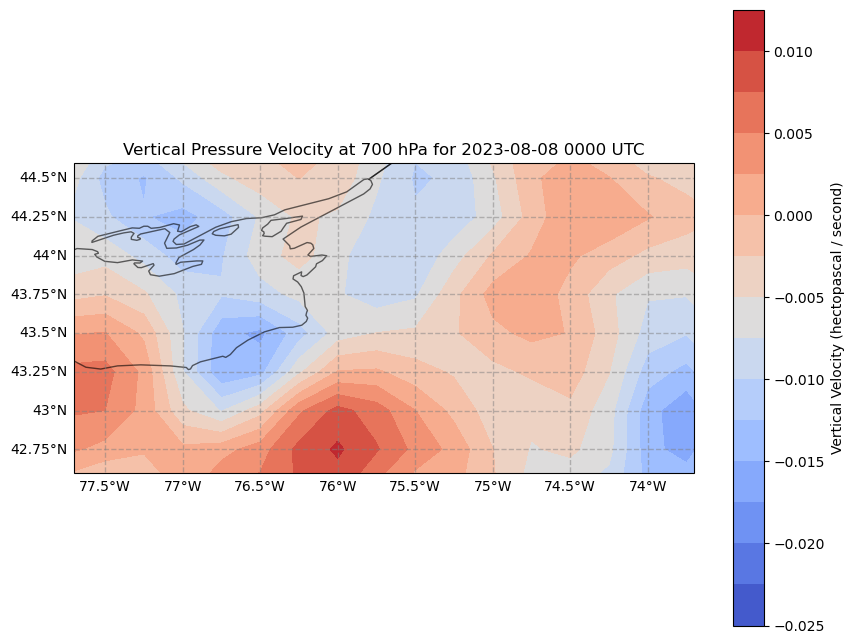

In [9]:
datacrs = ccrs.PlateCarree() # Since data is lat-lon, use the Plate Carree native projection. 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=datacrs) 

ax.set_extent([lonW, lonE, latS, latN], crs=datacrs)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black', alpha=0.6)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

cf = ax.contourf(vert_selected_level.longitude, vert_selected_level.latitude, vert_selected_level,
                 levels=15, cmap='coolwarm', transform=datacrs)

cbar = fig.colorbar(cf, ax=ax, orientation='vertical', 
                    label=f'Vertical Velocity ({vert_selected_level.metpy.units})') 

level_val = vert_selected_level.isobaricInhPa.item() 
ax.set_title(f'Vertical Pressure Velocity at {level_val:.0f} hPa for {timeStr}')

plt.show()

In this graph, the negative (blue) values of vertical velocity represent upward motion and rising air, and the positive (red) values indicate downward motion and sinking air. It can be seen that the areas of negative values match up with where severe thunderstorms were currently located at this time, such as around the Turin, NY area as well as farther southwest where there were other thunderstorms moving through, as there was rapid upward motion over these areas. On the other hand, the red shadings are located over areas where there was not much precpitation, or subsidence, so this graph makes sense and matches up with observations. 

## Content 2: The V-component Wind Data 

Another variable you can look at in this dataset is the V component of the wind. I wanted to look at a slightly bigger lat/lon range for this, so I re-defined the maximum and minimum lat/lon values.

In [10]:
lonmin = -85.5
lonmax = -70.5
latmin = 39.9
latmax = 46.9
cLat, cLon = (latmin + latmax)/2, (lonmin + lonmax)/2 

# Recall that in ERA5, longitudes run between 0 and 360, not -180 and 180
if (lonmin < 0 ):
    lonmin = lonmin + 360
if (lonmax < 0 ):
    lonmax = lonmax + 360
    
expand = 1
latRange = np.arange(latmin - expand,latmax + expand,.25) # expand the data range a bit beyond the plot range
lonRange = np.arange((lonmin - expand),(lonmax + expand),.25) # Need to match longitude values to those of the coordinate variable

Year = 2023
Month = 8
Day = 8
Hour = 0
Minute = 10
dateTime = dt(Year,Month,Day,Hour)
timeStr = dateTime.strftime("%Y-%m-%d %H%M UTC")
timeStr

'2023-08-08 0000 UTC'

Then, let's read in and inspect the data variable like we did before:

In [11]:
%%time 

if (use_DE):
    v = ds['v'].sel(valid_time=dateTime,latitude=latRange,longitude=lonRange, method='nearest')
else:
    v = ds['northward_wind'].sel(time=dateTime,latitude=latRange,longitude=lonRange)

v

CPU times: user 3.63 s, sys: 354 ms, total: 3.98 s
Wall time: 4 s


<xarray.DataArray 'v' (isobaricInhPa: 19, latitude: 36, longitude: 68)> Size: 186kB
dask.array<getitem, shape=(19, 36, 68), dtype=float32, chunksize=(1, 36, 68), chunktype=numpy.ndarray>
Coordinates:
  * isobaricInhPa  (isobaricInhPa) int32 76B 1000 925 850 700 600 ... 20 10 5 1
  * latitude       (latitude) float64 288B 39.0 39.25 39.5 ... 47.25 47.5 47.75
  * longitude      (longitude) float64 544B 273.5 273.8 274.0 ... 290.0 290.2
    number         int64 8B ...
    valid_time     datetime64[ns] 8B 2023-08-08
Attributes: (12/31)
    GRIB_NV:                                  0
    GRIB_Nx:                                  1440
    GRIB_Ny:                                  721
    GRIB_cfName:                              northward_wind
    GRIB_cfVarName:                           v
    GRIB_dataType:                            an
    ...                                       ...
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_units:                               m s**-1
    GRIB_uvRelativeToGrid:                    0
    long_name:                                V component of wind
    standard_name:                            northward_wind
    units:                                    m s**-1

In [12]:
print(v.values)

[[[-1.45605469e+00 -1.53613281e+00 -1.89746094e+00 ...  7.53515625e+00
    7.29687500e+00  7.03515625e+00]
  [-1.54199219e+00 -1.89062500e+00 -2.44531250e+00 ...  7.87109375e+00
    7.72656250e+00  7.50390625e+00]
  [-2.16601562e+00 -2.58398438e+00 -3.15625000e+00 ...  8.15625000e+00
    8.00000000e+00  7.84765625e+00]
  ...
  [-1.77539062e+00 -2.29492188e+00 -2.79101562e+00 ... -3.30468750e+00
   -1.63964844e+00  1.01989746e-01]
  [-2.07812500e+00 -2.45703125e+00 -2.87500000e+00 ... -4.02343750e+00
   -3.88671875e+00 -2.13476562e+00]
  [-2.10937500e+00 -2.58984375e+00 -3.05859375e+00 ... -1.91015625e+00
   -3.51562500e+00 -3.68945312e+00]]

 [[-8.40625000e+00 -8.45312500e+00 -8.80468750e+00 ...  9.96093750e+00
    9.83593750e+00  9.64843750e+00]
  [-7.63671875e+00 -7.79296875e+00 -8.20312500e+00 ...  1.08359375e+01
    1.06250000e+01  1.02812500e+01]
  [-7.61328125e+00 -7.70703125e+00 -8.00781250e+00 ...  1.14609375e+01
    1.11250000e+01  1.06406250e+01]
  ...
  [-7.15625000e+00 -7.4

As can be seen, the v-component wind data variable is in units of meters/second (m/s). It is better to convert this into knots (kts), because once again that is a more commonly measured unit for wind in weather maps. Luckily, we can use a simple unit conversion method to do this again. 

In [13]:
v_kts = v.metpy.convert_units('kts')

In [14]:
print(v_kts.values)

[[[-2.83034372e+00 -2.98600316e+00 -3.68836880e+00 ...  1.46471720e+01
    1.41839895e+01  1.36752491e+01]
  [-2.99739289e+00 -3.67508078e+00 -4.75330687e+00 ...  1.53001814e+01
    1.50192356e+01  1.45864267e+01]
  [-4.21039724e+00 -5.02286386e+00 -6.13525915e+00 ...  1.58544807e+01
    1.55507555e+01  1.52546234e+01]
  ...
  [-3.45108318e+00 -4.46097136e+00 -5.42530012e+00 ... -6.42379856e+00
   -3.18722153e+00  1.98252201e-01]
  [-4.03955173e+00 -4.77608633e+00 -5.58855295e+00 ... -7.82093668e+00
   -7.55517673e+00 -4.14965248e+00]
  [-4.10029697e+00 -5.03425360e+00 -5.94543028e+00 ... -3.71304655e+00
   -6.83382797e+00 -7.17172289e+00]]

 [[-1.63404427e+01 -1.64315605e+01 -1.71149426e+01 ...  1.93625126e+01
    1.91195316e+01  1.87550621e+01]
  [-1.48445930e+01 -1.51483192e+01 -1.59455986e+01 ...  2.10633774e+01
    2.06533470e+01  1.99851513e+01]
  [-1.47990341e+01 -1.49812698e+01 -1.55659418e+01 ...  2.22782803e+01
    2.16252689e+01  2.06837196e+01]
  ...
  [-1.39106369e+01 -1.4

We once again need to select a pressure level. Let's use the 850 hPa level this time, where wind flow in weather maps is commonly measured. 

In [15]:
target_pressure = 850 * units.hPa 
v_selected_level = v.sel(isobaricInhPa=target_pressure, method='nearest')

print("Shape after selecting 850 hPa level:", v_selected_level.shape)

Shape after selecting 850 hPa level: (36, 68)


Then we can finally make the plot, using the same setup we used for the vertical velocity, except making sure to modify the lat/lon extent to the new variables we defined, and the modified variable we used to convert the 'v' data variable into a 2D data shape. 

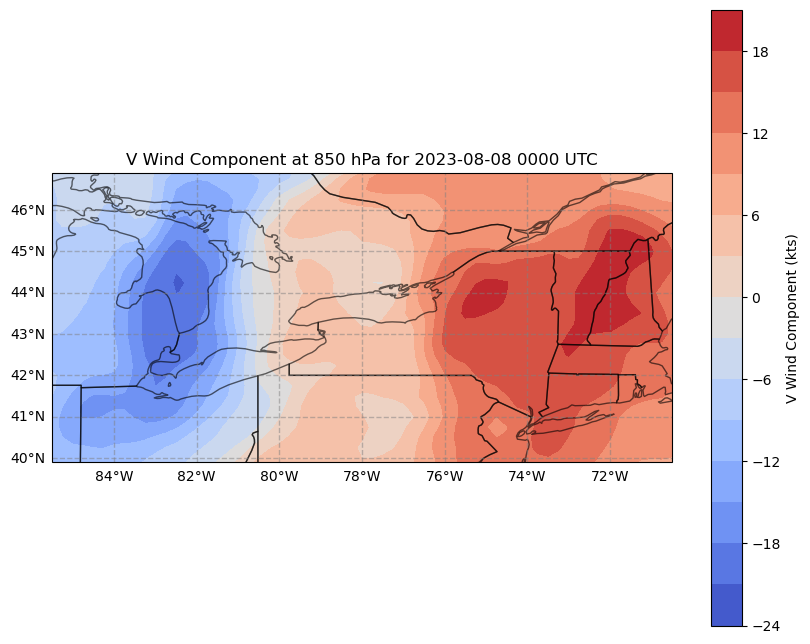

In [16]:
datacrs = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=datacrs) 

ax.set_extent([lonmin, lonmax, latmin, latmax], crs=datacrs)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black', alpha=0.6)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

cf = ax.contourf(v_selected_level.longitude, v_selected_level.latitude, v_selected_level,
                 levels=15, cmap='coolwarm', transform=datacrs)

cbar = fig.colorbar(cf, ax=ax, orientation='vertical', 
                    label=f'V Wind Component (kts)') 

level_val = v_selected_level.isobaricInhPa.item() 
ax.set_title(f'V Wind Component at {level_val:.0f} hPa for {timeStr}')

plt.show()

On the graph, the red values represent positive values of the v-component (southerly wind), and the blues represent negative values (northerly wind). The system's warm sector over eastern NY and New England down into the Mid-Atlantic can clearly be made out, as well as the winds turning more northerly behind the cold frontal passage across the Great Lakes into the Ohio Valley. The front was moving through western NY and northwest PA at this time, which explains the lighter red and blue shadings as you go further west. 

## Summary

To conclude this notebook, it can be seen that you can use another dataset like ERA5 to verify the accuracy of the GridRad radar reflecitivy data, as well as other variables. In this notebook, we made graphs of the vertical pressure velocity at 700 hPA and the v-wind component at 850 hPa from the ERA5 Pressure Level Hourly Data, and this seemed to match up with the GR-S radar refl. and AZ shear data in regards to location, as well as real-life observations. 

## Destination Earth ERA5 Data Hub 

[ERA5 Hourly Data](https://earthdatahub.destine.eu/collections/era5/datasets/reanalysis-era5-pressure-levels) 